Add pandas package for tabular data

In [0]:
import pandas as pd

Package to load data saved by the pre-processing phase.

In [0]:
import pickle

In [0]:
!git clone https://github.com/wshuyi/demo_traffic_jam_prediction.git

Cloning into 'demo_traffic_jam_prediction'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.


Path of data folder.

In [0]:
from pathlib import Path
data_dir = Path('demo_traffic_jam_prediction')

Open data file and load two different data variables.

In [0]:
with open(data_dir / 'data.pickle', 'rb') as f:
    [event_dict, df] = pickle.load(f)

Dictionary of events.

In [0]:
event_dict

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

Inside the Dataframe:

First 10 rows:

In [0]:
df.head(10)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


Last 10 rows:

In [0]:
df.tail(10)

,label,events
851,0,"[traffic jam, traffic jam, traffic jam]"
852,0,"[stopped traffic, traffic jam, stopped traffic]"
853,0,"[stopped car on the shoulder, stopped traffic,..."
854,0,[stopped traffic]
855,0,"[stopped car on the shoulder, stopped car on t..."
856,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
857,0,"[traffic jam, traffic jam]"
858,0,"[traffic jam, traffic jam, traffic heavier tha..."
859,0,"[heavy traffic, stopped car on the shoulder, t..."
860,0,"[heavy traffic, stopped car on the shoulder, s..."


Get index with the largest value:

In [0]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

105

Sequence of row with the largest value:

In [0]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

Length of longest sequence:

In [0]:
maxlen = len(max_len_event.events)
maxlen

84

Convert from index: event type to event type:index

In [0]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k

display reversed dictionary:

In [0]:
reversed_dict

{'accident': 12,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'flooding': 29,
 'fog': 11,
 'hail': 31,
 'hazard on road': 26,
 'hazard on the shoulder': 25,
 'heavy traffic': 17,
 'huge traffic jam': 32,
 'ice on roadway': 27,
 'large traffic jam': 24,
 'major event': 7,
 'malfunctioning traffic light': 20,
 'medium traffic jam': 19,
 'minor accident': 18,
 'missing sign on the shoulder': 21,
 'object on roadway': 6,
 'other': 5,
 'pothole': 8,
 'road closed': 4,
 'road closed due to construction': 1,
 'road closed due to hazard': 30,
 'road construction': 10,
 'slowdown': 13,
 'small traffic jam': 15,
 'stopped car': 14,
 'stopped car on the shoulder': 3,
 'stopped traffic': 16,
 'traffic heavier than normal': 9,
 'traffic jam': 2,
 'weather hazard': 28}

Convert list of events into a list of numbers:

In [0]:
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

Use longest list on function:

In [0]:
map_event_list_to_idxs(max_len_event.events)

[3,
 17,
 17,
 17,
 13,
 16,
 17,
 17,
 17,
 17,
 9,
 3,
 2,
 17,
 16,
 16,
 16,
 17,
 2,
 3,
 16,
 16,
 16,
 17,
 9,
 9,
 9,
 9,
 17,
 16,
 9,
 8,
 3,
 2,
 13,
 16,
 17,
 9,
 2,
 2,
 3,
 7,
 2,
 2,
 16,
 17,
 9,
 3,
 13,
 17,
 17,
 3,
 2,
 13,
 13,
 17,
 3,
 17,
 18,
 3,
 17,
 3,
 17,
 16,
 17,
 9,
 17,
 3,
 9,
 16,
 17,
 17,
 17,
 3,
 13,
 16,
 17,
 3,
 9,
 17,
 18,
 7,
 3,
 3]

Load numpy and utility functions from Keras:

In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


Number of event types:

In [0]:
len(event_dict)

32

Convert all sequence of events into lists of numbers:

In [0]:
df.events.apply(map_event_list_to_idxs)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
                             ...                        
856                    [17, 17, 17, 2, 3, 2, 2, 2, 2, 2]
857                                               [2, 2]
858                                  [2, 2, 9, 17, 2, 2]
859                            [17, 3, 2, 2, 2, 2, 2, 2]
860    [17, 3, 3, 17, 3, 17, 2, 3, 18, 14, 3, 3, 16, ...
Name: events, Length: 1722, dtype: object

Result list:

In [0]:
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[9,
  17,
  18,
  14,
  13,
  17,
  3,
  13,
  16,
  3,
  17,
  17,
  16,
  3,
  16,
  17,
  9,
  17,
  2,
  17,
  2,
  7,
  16,
  17,
  17,
  17,
  17,
  13,
  5,
  17,
  9,
  9,
  16,
  16,
  3],
 [2, 10, 3],
 [2],
 [2],
 [2, 2, 2, 2, 2, 2, 2, 9]]

In [0]:
len(sequences)

1722

All input sequences should share the same length. Use length of longest sequence as max length and pad other shorter sequences with 0s from the beginning.

In [0]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ..., 16, 16,  3],
       [ 0,  0,  0, ...,  2, 10,  3],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 17,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  3,  3,  2]], dtype=int32)

Save label column into variable labels.

In [0]:
labels = np.array(df.label)

Specify random seed value:

In [0]:
np.random.seed(12)

Shuffle sequences along with their corresponding labels. 

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Training set will contain 80% of data. 20% goes into the validation set.

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

Divide data into training and validation sets, along with the labels.

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

Display content of training data. Number of event types will now be 33 instead of 32 because of the padding.

In [0]:
X_train

array([[ 0,  0,  0, ..., 15, 15,  3],
       [ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 16],
       ...,
       [ 0,  0,  0, ...,  2, 15, 16],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int32)

In [0]:
num_events = len(event_dict) + 1

Convert each number into a vector, with each vector containing 20 scalars.

In [0]:
embedding_dim = 20

Initial embedding matrix, generated randomly:

In [0]:
embedding_matrix = np.random.rand(num_events, embedding_dim)

Use the sequential model in Keras and put different layers one by one. 
Layer 1: Embedding layer
Layer 2: LSTM layer
Layer 3: Dense (activation function is sigmoid for binary classification)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

To handle parameters in the embedding layer, load in the initial embedding matrix generated randomly and not let the training process change the weights in Embedding layer. 

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Train model and save into an h5 file:

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_untrainable.h5")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 4s 3ms/step - loss: 0.6811 - acc: 0.5621 - val_loss: 0.6795 - val_acc: 0.5826
Epoch 2/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6527 - acc: 0.6107 - val_loss: 0.6563 - val_acc: 0.6261
Epoch 3/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6277 - acc: 0.6652 - val_loss: 0.6905 - val_acc: 0.5449
Epoch 4/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6111 - acc: 0.6790 - val_loss: 0.6980 - val_acc: 0.5855
Epoch 5/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5950 - acc: 0.6848 - val_loss: 0.5887 - val_acc: 0.7304
Epoch 6/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5929 - acc: 0.6892 - val_loss: 0.6450 - val_acc: 0.6261
Epoch 7/50
1377/1377 [=============================

Curve visualization for accuracy and loss using matplotlib

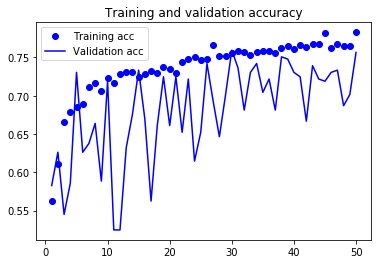

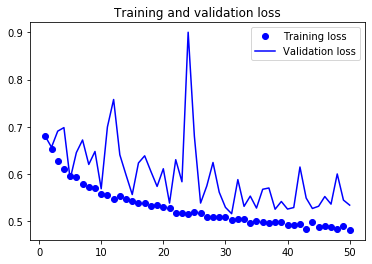

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Experiment allowing the Embedding layer to be trained and adjusted.

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

Set parameter trainable to true.

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

compile and run...

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable.h5")

Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6808 - acc: 0.5839 - val_loss: 0.6630 - val_acc: 0.6290
Epoch 2/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6393 - acc: 0.6543 - val_loss: 0.6652 - val_acc: 0.5681
Epoch 3/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6038 - acc: 0.6906 - val_loss: 0.8395 - val_acc: 0.5246
Epoch 4/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5823 - acc: 0.7190 - val_loss: 0.5925 - val_acc: 0.6783
Epoch 5/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5665 - acc: 0.7240 - val_loss: 0.5549 - val_acc: 0.7275
Epoch 6/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5572 - acc: 0.7240 - val_loss: 0.5738 - val_acc: 0.6667
Epoch 7/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5539 - acc: 0.7262 - val_loss: 0.5665 - val_acc: 0.6957
Epoch 8/50
1377

Draw curves of accuracy and loss...

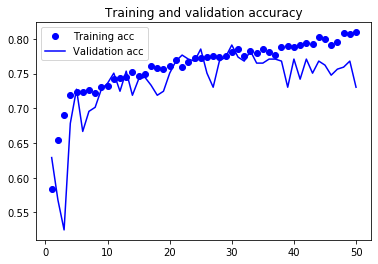

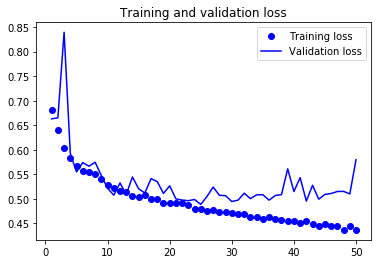

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Bring down complexity of the model (dropout)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Keep parameter trainable to true:

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

Run training:

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable_with_dropout.h5")

Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 5s 3ms/step - loss: 0.6757 - acc: 0.5824 - val_loss: 0.6603 - val_acc: 0.5652
Epoch 2/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6461 - acc: 0.6289 - val_loss: 0.6386 - val_acc: 0.6812
Epoch 3/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6401 - acc: 0.6383 - val_loss: 0.6362 - val_acc: 0.6319
Epoch 4/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6232 - acc: 0.6536 - val_loss: 0.6519 - val_acc: 0.6029
Epoch 5/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6067 - acc: 0.6768 - val_loss: 0.6209 - val_acc: 0.6348
Epoch 6/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5986 - acc: 0.6812 - val_loss: 0.5978 - val_acc: 0.6609
Epoch 7/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.5877 - acc: 0.6979 - val_loss: 0.5955 - val_acc: 0.6609
Epoch 8/50
1377

Display visualization:

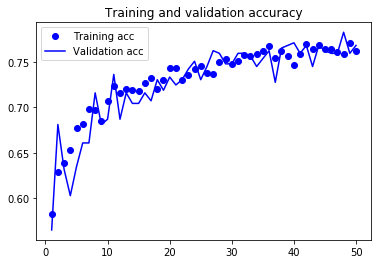

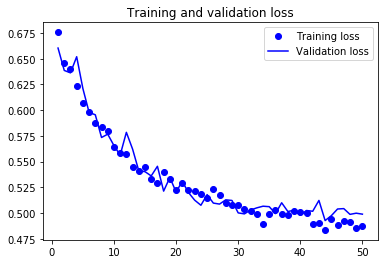

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()